# TCLab step test

Here we do a step test of the TCLab

In [25]:
from tclab import runexperiment
import matplotlib.pyplot as plt

In [26]:
import numpy

In [27]:
%matplotlib notebook

In [28]:
Q1_0 = 50
stepsize = 10
steptime = 1000

In [29]:
def steptest(t, lab):
    lab.Q1(Q1_0 if t < steptime else Q1_0 + stepsize)

In [30]:
%matplotlib notebook

TCLab version 0.4.6dev
NHduino connected on port /dev/cu.wchusbserial1410 at 115200 baud.
TCLab Firmware 1.3.0 Arduino Uno.


<IPython.core.display.Javascript object>


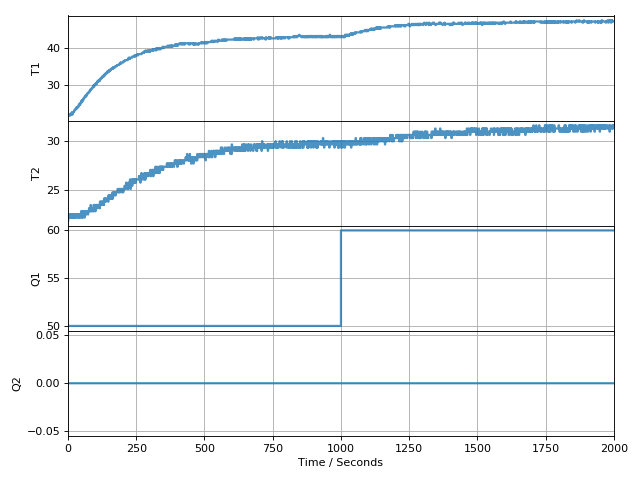

TCLab disconnected successfully.
CPU times: user 2min 42s, sys: 19.4 s, total: 3min 2s
Wall time: 33min 24s


In [31]:
%%time
experiment = runexperiment(steptest, connected=True, 
                           plot=True, twindow=2000,
                           time=2000, 
                           speedup=1,
                           synced=True,
                           dbfile='sinetest.db',
                          )

In [32]:
h = experiment.historian

In [62]:
tau_p = 150
K_p = 0.4
theta = 15

In [63]:
T1_0 = 43

In [64]:
t = numpy.array(h.t)

In [65]:
resp = numpy.maximum(stepsize*K_p*(1 - numpy.exp(-(t - theta - steptime)/tau_p)), 0) + T1_0

<IPython.core.display.Javascript object>


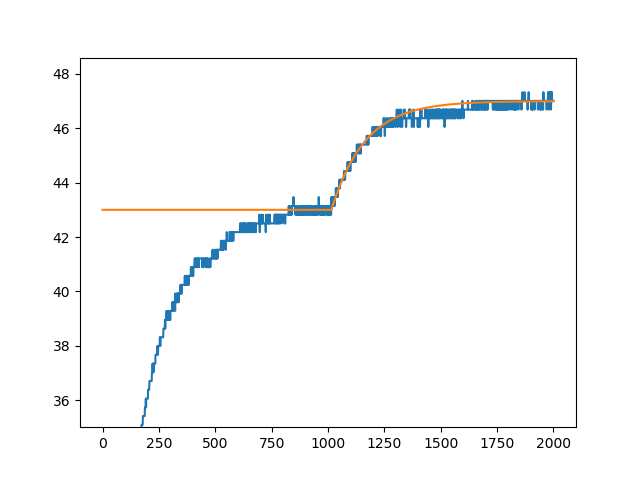

(35, 48.603)

In [66]:
plt.figure()
plt.plot(h.t, h.logdict['T1'])
plt.plot(h.t, resp)
plt.ylim(ymin=35)